<a href="https://colab.research.google.com/github/VN-nguyenthanhtam/test/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diện tích (m2): 2000
Nhập số phòng ngủ: 2
Nhập số phòng tắm: 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Giá nhà dự đoán: 171,301.18
Sai số bình phương trung bình (MSE): 2,071,562.32
Hệ số xác định (R²): 0.99


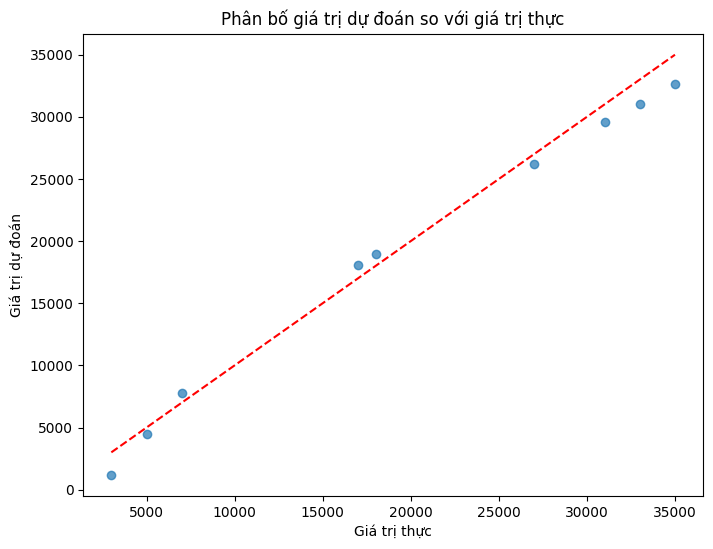

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp Excel
df = pd.read_excel('AI.xlsx')

# Chuyển đổi tất cả các tên cột thành kiểu string (nếu cần)
df.columns = df.columns.astype(str)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df[['Diện tích (m2)', 'Số phòng ngủ', 'Số phòng tắm']]
y = df['Giá nhà (nghìn)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán giá nhà
area = float(input("Diện tích (m2): "))
bedrooms = int(input("Nhập số phòng ngủ: "))
bathrooms = int(input("Nhập số phòng tắm: "))
predicted_price = lr.predict([[area, bedrooms, bathrooms]])
print(f"Giá nhà dự đoán: {predicted_price[0]:,.2f}")

# Đánh giá mô hình
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Sai số bình phương trung bình (MSE): {mse:,.2f}")
print(f"Hệ số xác định (R²): {r2:.2f}")

# In thông tin mô hình (nếu cần)
# print("\nHệ số của mô hình:")
# print(lr.coef_)

# Vẽ biểu đồ phân bố giá trị dự đoán so với giá trị thực
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Giá trị thực")
plt.ylabel("Giá trị dự đoán")
plt.title("Phân bố giá trị dự đoán so với giá trị thực")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()